Problem Statement
In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

Hint:

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

from sklearn import datasets

In [103]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D as mplax3d

from sklearn import decomposition as dcn

from sklearn import datasets as dst

In [104]:
iris = dst.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [105]:
irisdf = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width']) 
irisvar= pd.DataFrame(iris.target, columns=['iris variety'])
irisvar=irisvar.replace({0: 'Iris Setosa', 1: 'Iris Versicolor', 2: 'Iris Virginica'})

In [106]:
pca = dcn.PCA(n_components=3).fit_transform(irisdf)
pcadf = pd.DataFrame(data = pca, columns = ['PC1_Iris_Setosa', 'PC2_Iris_Versicolor', 'PC3_Iris_Virginica'])
pcaplot = pd.concat([pcadf, irisvar], axis = 1)

In [107]:
iris_setosa = pcaplot['PC1_Iris_Setosa']
iris_versicolor = pcaplot['PC2_Iris_Versicolor']
iris_virginica = pcaplot['PC3_Iris_Virginica']

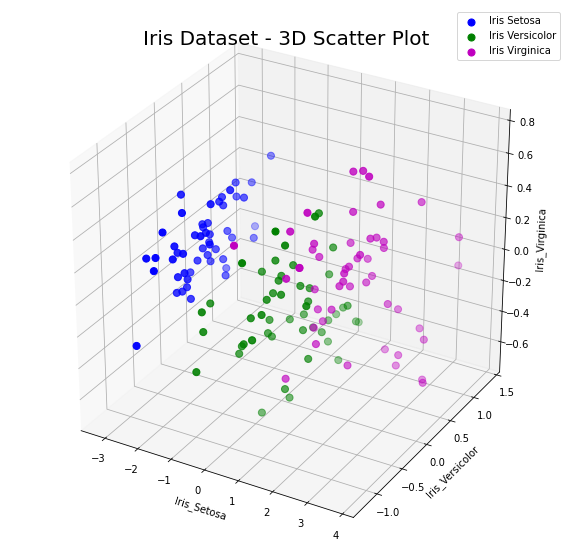

In [108]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Iris_Setosa', fontsize = 10)
ax.set_ylabel('Iris_Versicolor', fontsize = 10)
ax.set_zlabel('Iris_Virginica', fontsize = 10)
ax.set_title('Iris Dataset - 3D Scatter Plot', fontsize = 20)

cols = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']
clr = ['b', 'g', 'm']
for cols, clr in zip(cols,clr):
    variety = pcaplot['iris variety'] == cols
    ax.scatter(pcaplot.loc[variety, 'PC1_Iris_Setosa'], pcaplot.loc[variety, 'PC2_Iris_Versicolor'], pcaplot.loc[variety, 'PC3_Iris_Virginica']
            , c = clr
            , s = 50)
ax.legend(['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'])
ax.grid()
plt.show()